In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df= pd.read_csv('all_data.csv')

In [7]:
print(df.dtypes)

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


In [8]:
countries = df['Country'].unique()
print(countries)
years = df['Year'].unique()
print(years)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [9]:
print(df.columns)

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


# Planning

### Data Structure:
    15 Years of Life Expectancy and GDP data. 2000 - 2015
    6 Countries. Chile, China, Germany, Mexico, USA, Zimbabwe
### Deliverables:
    Scatter Plot of Life Expectancy as a function of GDP (or vice-versa) for each of the 6 countries
        - 2 row 3 column. Put the developing countries on top then developed on bottom
        -study shape to see if they are positively or negatively corellated
    Assuming corellation is evident from scatter plot, extension:
        -linear regression OLS between two variables. separate regression per country
    
    


# Initial Visualization

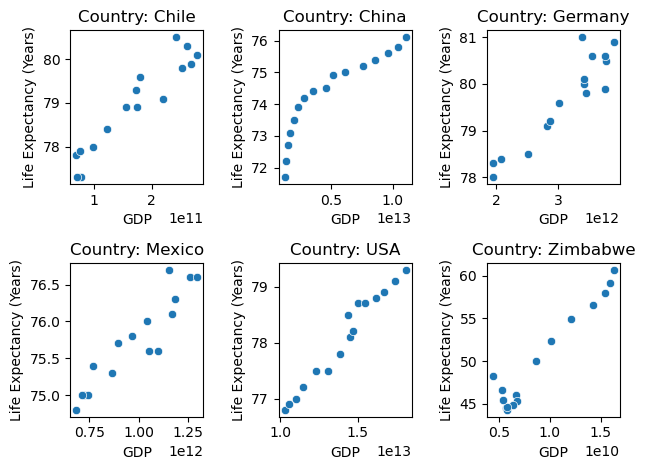

In [10]:
for i in range(1,7):
    country = countries[i-1]
    plt.subplot(2, 3, i)
    sns.scatterplot(data= df[df['Country'] == country], x= 'GDP', y='Life expectancy at birth (years)')
    plt.ylabel('Life Expectancy (Years)')
    if country == 'United States of America':
        c = 'USA'
    else:
        c = country
    plt.title(f'Country: {c}')
plt.tight_layout()
plt.show()

### Repeat with axes inverted.

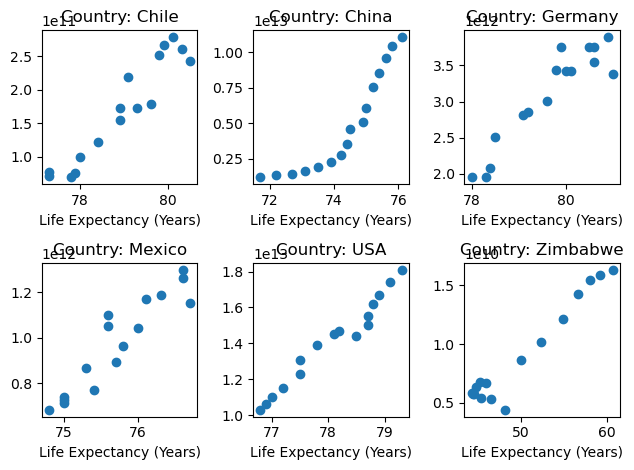

In [11]:
plt.clf()
for i in range(1,7):
    country = countries[i-1]
    plt.subplot(2, 3, i)
    #sns.scatterplot(data= df[df['Country'] == country], y= 'GDP', x='Life expectancy at birth (years)')
    plt.scatter(x=df[df['Country'] == country]['Life expectancy at birth (years)'], y = df[df['Country'] == country]['GDP'])
    plt.xlabel('Life Expectancy (Years)')
    if country == 'United States of America':
        c = 'USA'
    else:
        c = country
    plt.title(f'Country: {c}')
plt.tight_layout()
plt.show()

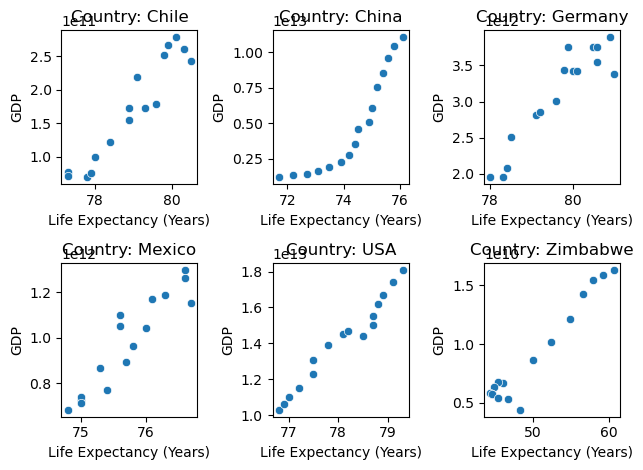

In [12]:
plt.clf()
for i in range(1,7):
    country = countries[i-1]
    plt.subplot(2, 3, i)
    sns.scatterplot(data= df[df['Country'] == country], y= 'GDP', x='Life expectancy at birth (years)')
    #plt.scatter(x=df[df['Country'] == country]['Life expectancy at birth (years)'], y = df[df['Country'] == country]['GDP'])
    plt.xlabel('Life Expectancy (Years)')
    if country == 'United States of America':
        c = 'USA'
    else:
        c = country
    plt.title(f'Country: {c}')
plt.tight_layout()
plt.show()

# Time Series Plots

### USA

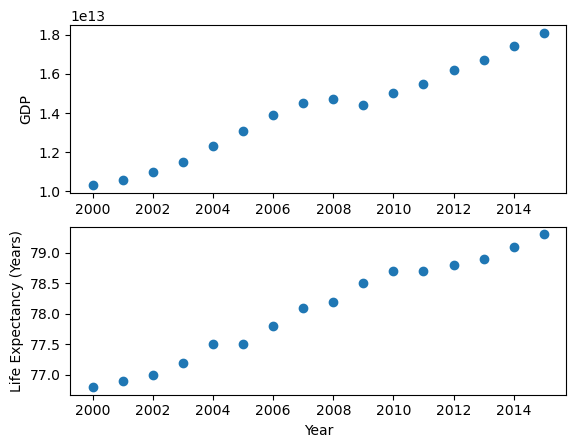

In [15]:
usa_data = df[df['Country']=='United States of America']
usa_life = usa_data['Life expectancy at birth (years)']
usa_years = usa_data['Year']
usa_gdp= usa_data['GDP']

plt.clf()
plt.subplot(2,1,1)
plt.xlabel('')
plt.ylabel('GDP')
plt.scatter(x=usa_years, y = usa_gdp)

plt.subplot(2,1,2)
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.scatter(x=usa_years, y=usa_life)

plt.show()

What is the point of showing a time series like this? Well, it confirms the correlation between the two variables. But it also shows there may be a lag in the influence between the two variables. GDP drops from 2008 to 2009, but the drop in Life Expectancy at birth doesn't occur until 2010 to 2011. Let's see if a similar lag is noticeable in the other five countries.

<Figure size 640x480 with 0 Axes>

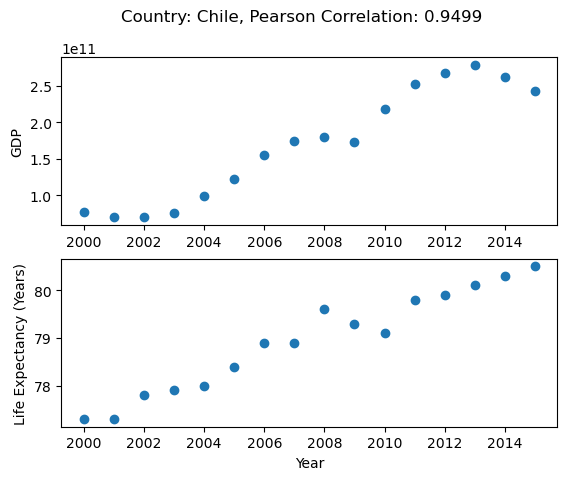

In [28]:
#reuse code above but make it more functional
def plotForCountry(i):
    c = df['Country'].unique()[i]
    country_data = df[df['Country']== c]
    country_life = country_data['Life expectancy at birth (years)']
    country_years = country_data['Year']
    country_gdp= country_data['GDP']
    r = round(stats.pearsonr(country_gdp, country_life)[0], 4)
    plt.clf()
    fig, ax = plt.subplots(2,1)
    fig.suptitle(f'Country: {c}, Pearson Correlation: {r}')
    plt.subplot(2,1,1)
    plt.xlabel('')
    plt.ylabel('GDP')
    plt.scatter(x=country_years, y = country_gdp)

    plt.subplot(2,1,2)
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy (Years)')
    plt.scatter(x=country_years, y=country_life)

    plt.show()
                 
plotForCountry(0)                 

<Figure size 640x480 with 0 Axes>

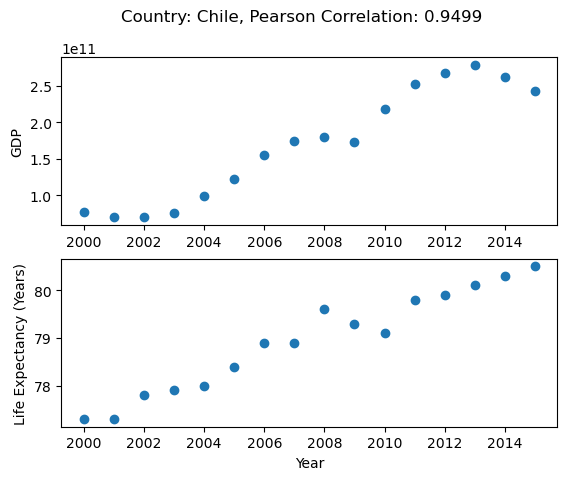

<Figure size 640x480 with 0 Axes>

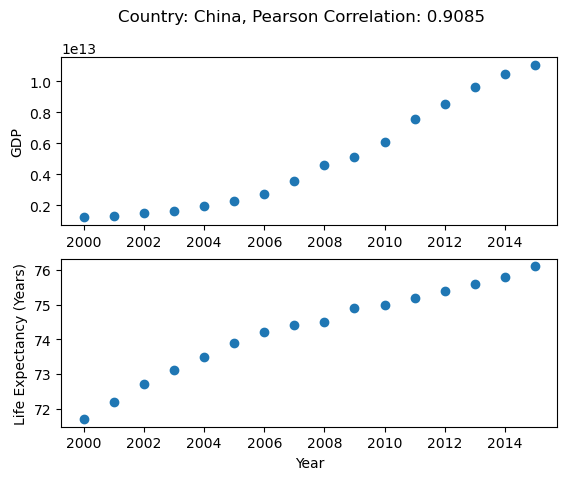

<Figure size 640x480 with 0 Axes>

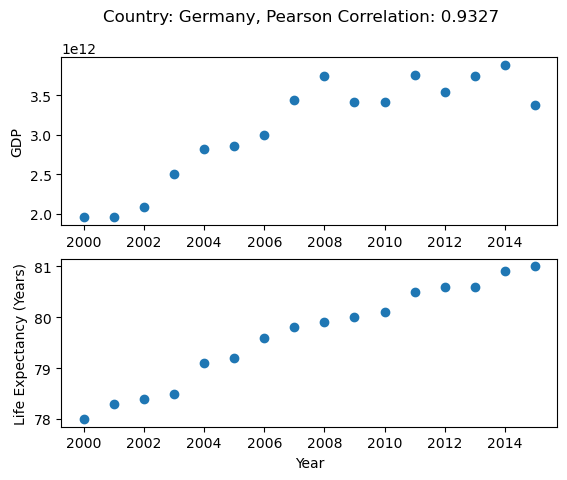

<Figure size 640x480 with 0 Axes>

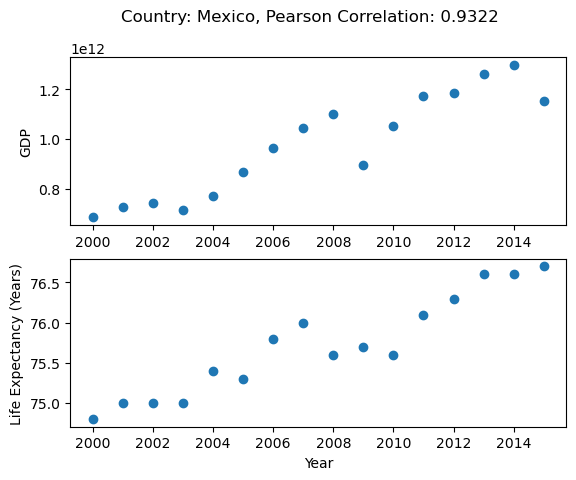

<Figure size 640x480 with 0 Axes>

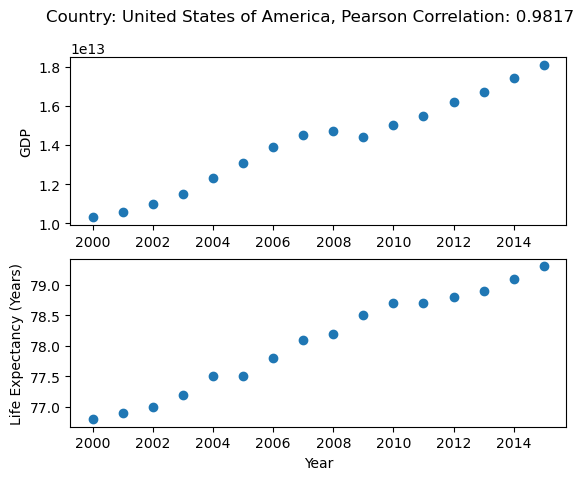

<Figure size 640x480 with 0 Axes>

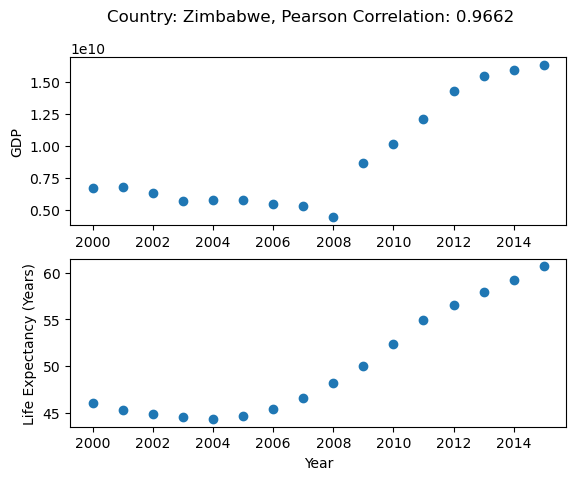

In [29]:
for j in range(0,6):
    plotForCountry(j)